# APRENDIZAJE NO SUPERVISADO

In [16]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

## Clustering

### Agglomerative clustering

<IPython.core.display.Javascript object>


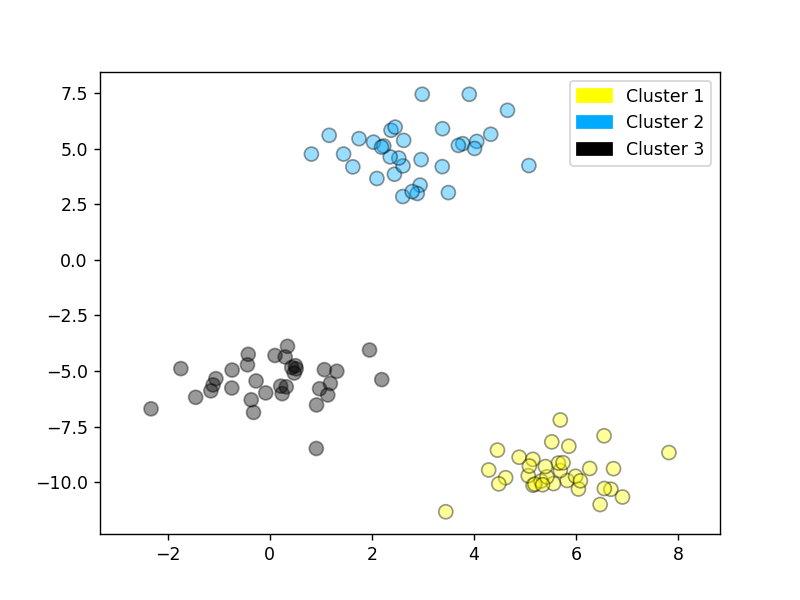

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10) #100 por defectos n_samples

#efecto linkaege complete
# numero de clusters

cls = AgglomerativeClustering(n_clusters = 3, linkage='complete')
cls_assignment = cls.fit_predict(X) 

plot_labelled_scatter(X, cls_assignment, 
   ['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [28]:
cls.cluster_centers_ #hacer con labels_

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

In [29]:
cls_assignment

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0], dtype=int64)

In [30]:
cls.predict([[1,1]])

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [31]:
cls.intertia_ # las otras metricas si se pueden calcular

AttributeError: 'AgglomerativeClustering' object has no attribute 'intertia_'

In [32]:
cls.labels_

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

sse = {}
for k in range(2, 10):
    cls = AgglomerativeClustering(n_clusters = k, linkage='complete')
    cls_assignment = cls.fit_predict(X)
    
   
     
    
    
    #silhouette_avg = silhouette_score(X, cls_assignment)
    #print(        "For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
    
   
    
    davies = davies_bouldin_score(X, cls_assignment)
    print(        "For n_clusters =", k,"The average davies_boulder is is :", davies)

For n_clusters = 2 The average davies_boulder is is : 0.3987137462288316
For n_clusters = 3 The average davies_boulder is is : 0.2962526319512608
For n_clusters = 4 The average davies_boulder is is : 0.5877021588325123
For n_clusters = 5 The average davies_boulder is is : 0.8730472410366856
For n_clusters = 6 The average davies_boulder is is : 0.9167302125531348
For n_clusters = 7 The average davies_boulder is is : 0.865181252730317
For n_clusters = 8 The average davies_boulder is is : 0.9755741149183355
For n_clusters = 9 The average davies_boulder is is : 0.9987345209107078


#### Creating a dendrogram (using scipy) SIRVE TAMBIEN PARA DECIDIR EL NUMERO DE CLUSTERS DE AGLOMERATIVO

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

<IPython.core.display.Javascript object>


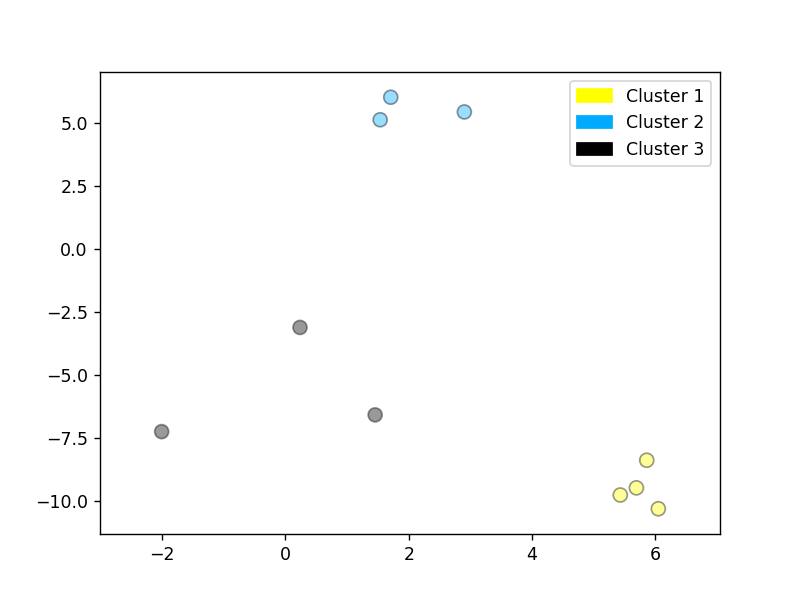

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [36]:
X1, y1 = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X1, y1, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X1)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

<IPython.core.display.Javascript object>


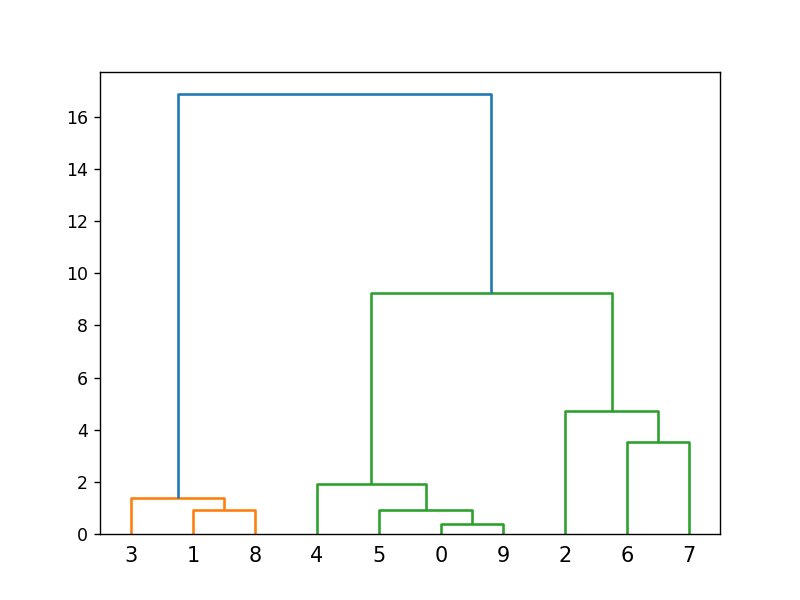

In [38]:
from scipy.cluster.hierarchy import ward, dendrogram, complete
plt.figure()
dendrogram(complete(X1))
plt.show()

<IPython.core.display.Javascript object>


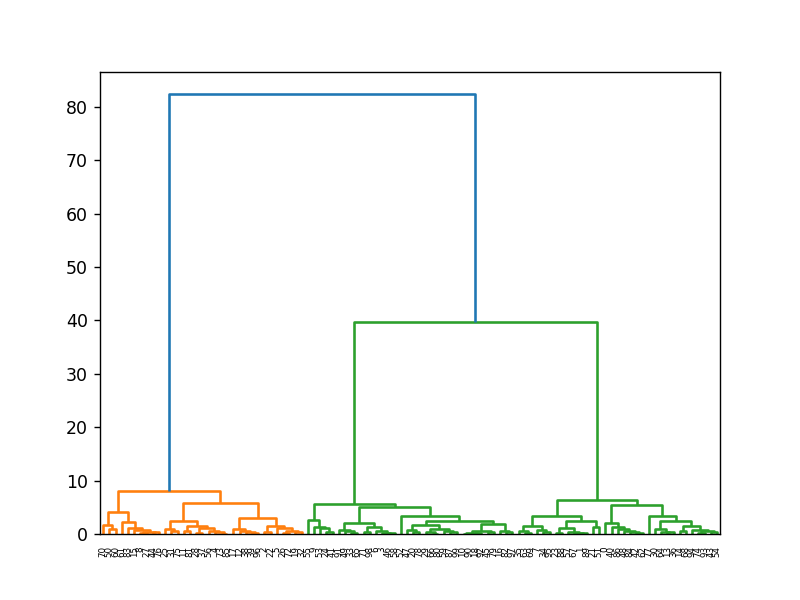

In [7]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

# LA COSA ES MAS COMPLEJA Y COSTOSA CON MUCHOES ELEMENTOS

### DBSCAN clustering

Cluster membership values:
[ 0  1  1  0  2  2  0  0  0  2  1  0  1  2  1  1 -1  2  1  0  2  0  2  1
  0  1  2  2  0  1  2  0  2  0  0  1  2  1  1  2 -1  0  2  1  1  2  0  1
  2  2  2  1  1  2  2  2  1  0  1  1  2  0  2  1  1  1  1  1 -1  2  0  1
  0  2  1  1  0  1  1  1  0  2  0  0  2  2  0  0  1  1  0  0  0  1  0  2
  0  0  2  1  1  1  0  2  2  2  1  2  2  0 -1  2  1  0  2  1  2  1  1  0
  1  1  2  2  0  1  0  1  0  2  2  2  0  0  1  1  0  2  2  0  2 -1  2  0
  2  2  2  0  2  0  0  2  1  0  2  2  0  0  2  0  0  1  2  2  1  0  1 -1
  0  1  2  0  0  0  1  2  1  2  1  1  0 -1  2  1  1  1  2  2 -1  0  0 -1
  0  2  1  2  0  2  2  0  2  2  1  2 -1  0  0  1 -1  1  2  0  0  0  0  1
 -1  2  1  2  1  1  0  2  0  1  1  2  2  0  0  2  2  1  0  0  0  2  1  0
  1  0  1  0  1  1  0  0  0  1]


<IPython.core.display.Javascript object>


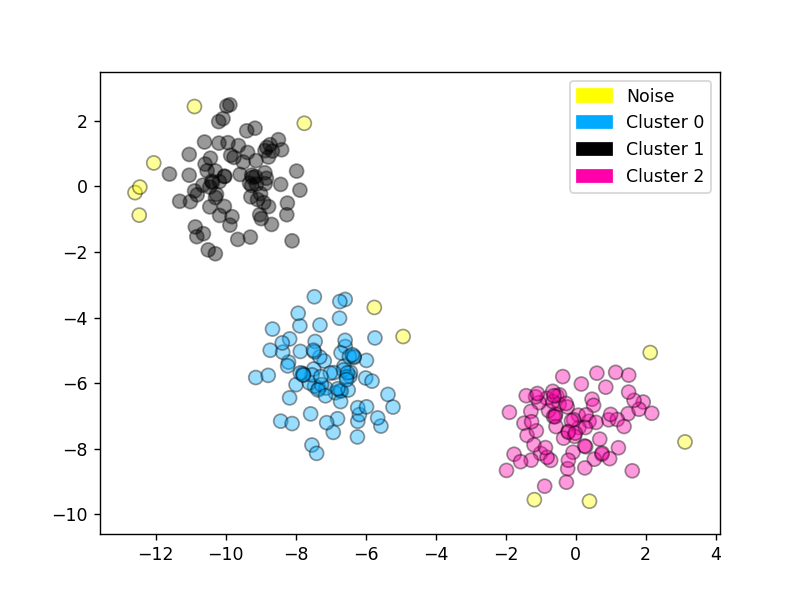

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 250)

dbscan = DBSCAN(eps = 0.8, min_samples = 4)

# mas eps desaparecen los outliers ....
#poner 250 samples ... y min_samles 4 al ser dimension 2 y eps el aproximado ....
#no hacen falta clusters. Probar, 0.1, 1. 2, 20)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

### CALCULO DE EPS OPTIMO

In [9]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=4) # n_neighbors es elvalor de min_samples que es 2*Dimension
#neighbors_fit = neighbors.fit(X)
distances, indices = neighbors.fit(X).kneighbors(X)





<IPython.core.display.Javascript object>


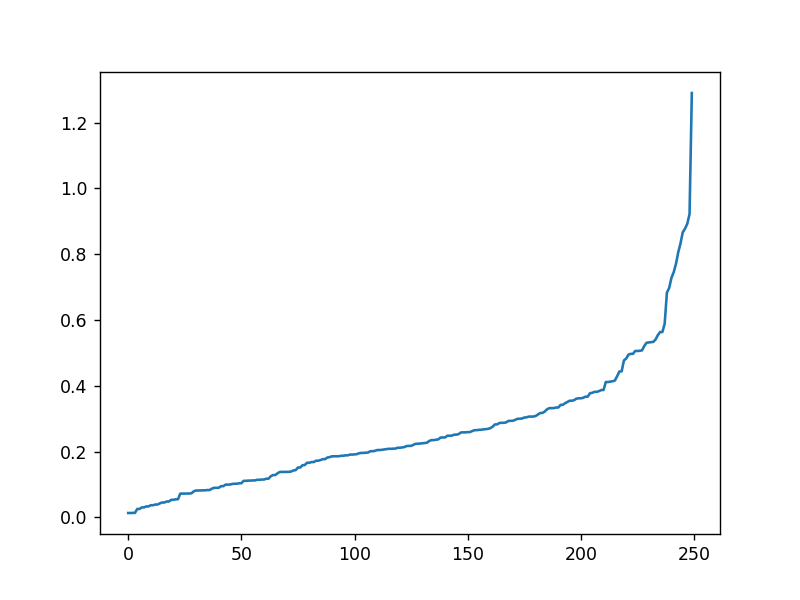

In [10]:

plt.figure()
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [11]:
distances

array([0.01357577, 0.01357577, 0.01396345, 0.01396345, 0.02584066,
       0.02584066, 0.0305448 , 0.0305448 , 0.03355785, 0.03355785,
       0.03721492, 0.03721492, 0.03934312, 0.03934312, 0.04284137,
       0.04551741, 0.04551741, 0.04849768, 0.04849768, 0.05361003,
       0.05361003, 0.05526933, 0.05526933, 0.07243109, 0.07244514,
       0.07244514, 0.07278583, 0.07278583, 0.07363064, 0.07956792,
       0.08190847, 0.08190847, 0.08206768, 0.08252862, 0.08252862,
       0.08330012, 0.08330012, 0.08764201, 0.09011635, 0.09015508,
       0.09015508, 0.09510669, 0.09510669, 0.09972279, 0.09972279,
       0.10004306, 0.10184924, 0.10253526, 0.10253526, 0.10396173,
       0.10396173, 0.11133007, 0.11133007, 0.11198339, 0.11198339,
       0.11258424, 0.11258424, 0.11451428, 0.11451428, 0.11524674,
       0.11524674, 0.1178106 , 0.1178106 , 0.12538733, 0.12890935,
       0.12890935, 0.13436242, 0.13830886, 0.13830886, 0.13834613,
       0.13857131, 0.13857131, 0.13962529, 0.14282955, 0.14387

## GAUSSIAN MIXTURE MODEL

<IPython.core.display.Javascript object>


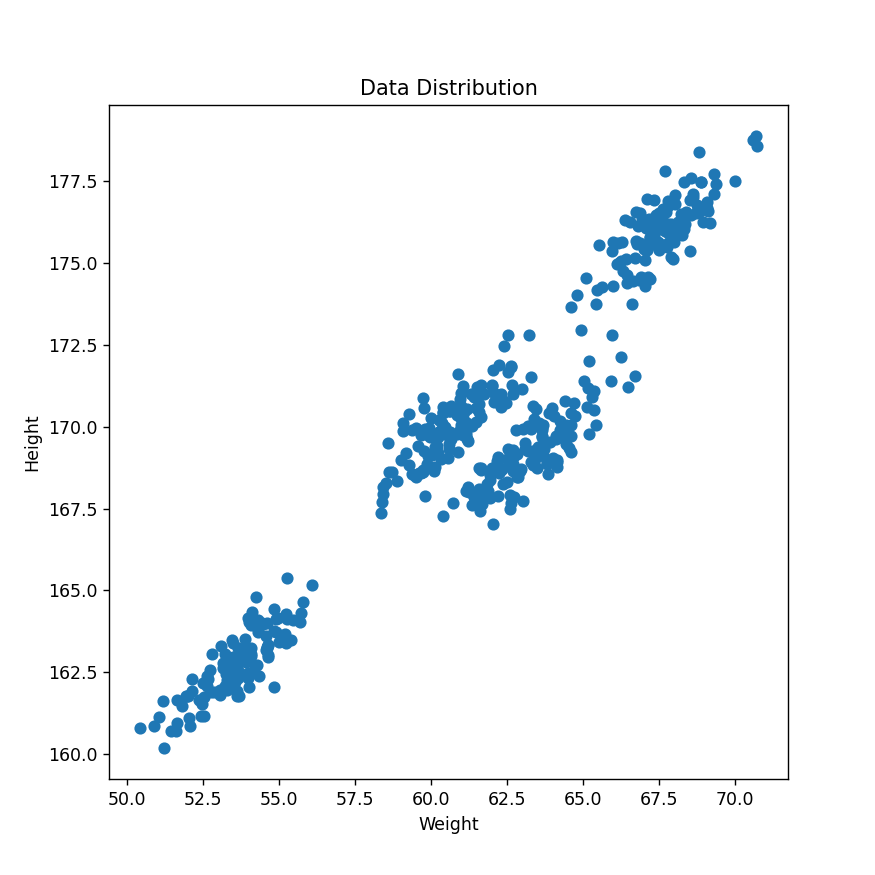

In [12]:
import pandas as pd
data = pd.read_csv('Clustering_gmm.csv')

plt.figure(figsize=(7,7))
plt.scatter(data["Weight"],data["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

0.5193657927874071
0.6517720217671404


<IPython.core.display.Javascript object>


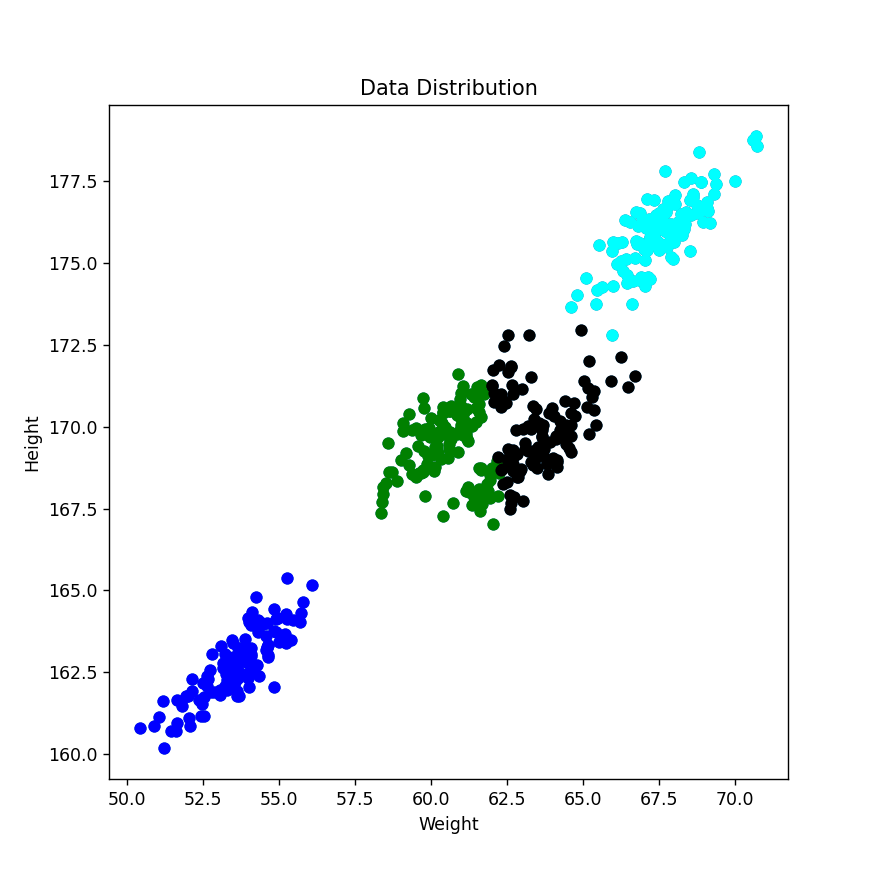

In [13]:
#training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

#predictions from kmeans
pred = kmeans.predict(data)



frame = pd.DataFrame(data)
frame['cluster'] = pred


print(davies_bouldin_score(data, pred))
print(silhouette_score(data, pred))



frame.columns = ['Weight', 'Height', 'cluster']
#plotting results
plt.figure(figsize=(7,7))
plt.scatter(data["Weight"],data["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])


[0 0 2 2 0 3 3 2 2 1 3 0 3 1 2 2 0 2 1 2 2 0 3 1 2 1 0 3 1 3 3 3 0 3 3 0 1
 2 1 0 1 2 2 0 3 0 2 2 0 0 1 1 3 2 2 3 3 1 1 0 0 1 0 0 0 3 2 0 2 3 1 2 1 0
 1 0 3 3 2 2 1 2 1 2 2 3 1 1 0 1 1 1 0 1 2 2 0 0 0 2 1 1 0 1 2 2 3 0 2 1 1
 3 1 1 0 1 0 2 3 0 2 1 0 0 1 0 0 0 0 1 2 1 3 1 1 1 2 0 2 3 0 0 0 0 3 1 2 2
 3 1 1 0 2 2 2 3 3 0 3 2 0 2 0 0 3 3 0 2 1 3 0 1 0 3 2 1 2 1 1 1 0 0 0 2 3
 1 3 0 3 1 0 3 1 3 3 1 2 3 2 1 1 2 3 3 2 3 3 2 3 3 3 0 0 0 2 0 3 1 1 1 2 0
 3 1 3 0 1 2 1 3 3 3 3 3 2 2 2 3 1 0 0 3 3 0 1 1 2 0 2 2 2 3 0 1 2 1 1 3 1
 3 2 2 0 1 0 0 2 2 1 0 2 1 0 3 0 1 3 3 2 0 0 2 0 3 0 3 3 0 2 2 2 0 1 1 0 1
 1 1 2 0 0 1 2 1 0 0 3 1 1 2 1 2 0 2 1 3 1 3 3 2 2 2 3 3 1 0 2 3 1 0 2 2 0
 0 3 0 3 3 2 3 1 0 0 2 0 2 0 0 0 0 2 0 2 0 2 2 1 0 2 1 1 3 2 0 0 3 3 0 3 1
 2 2 2 1 2 3 2 1 1 2 1 1 3 1 1 3 3 3 3 1 1 1 1 0 1 0 2 0 1 2 0 2 0 2 3 3 1
 2 1 3 2 0 1 3 2 0 1 3 3 2 0 2 0 3 0 2 0 1 3 0 1 0 2 3 2 3 0 1 2 2 3 0 0 2
 2 3 2 3 1 0 3 0 1 3 3 3 1 3 2 1 3 3 3 3 3 2 1 0 3 0 2 0 3 1 2 1 3 1 2 1 2
 3 3 1 3 3 3 1 0 3 3 1 2 

<IPython.core.display.Javascript object>


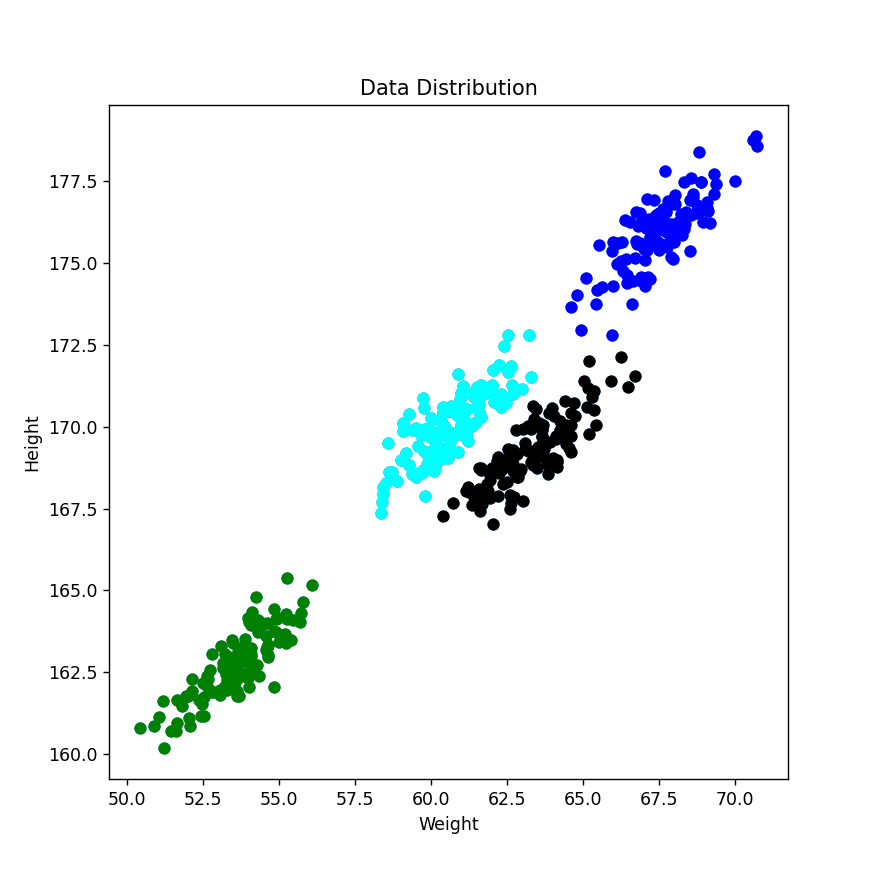

In [14]:
# training gaussian mixture model 

import pandas as pd
data = pd.read_csv('Clustering_gmm.csv')
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
print(labels)

proba=gmm.predict_proba(data)
print(proba)

print(davies_bouldin_score(data, labels))
print(silhouette_score(data, labels))

frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

plt.figure(figsize=(7,7))
plt.scatter(data["Weight"],data["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')


color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

### OTRAS METRICAS Metricas de medicion de la "compacidad"-compactness: homogeneity, completeness, rand-index, mutual_info_score (NO DADAS EN CLASE ...PARA QUE LO TENGAIS COMO REFERENCIA FUTURA)

In [15]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626
